<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [15]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


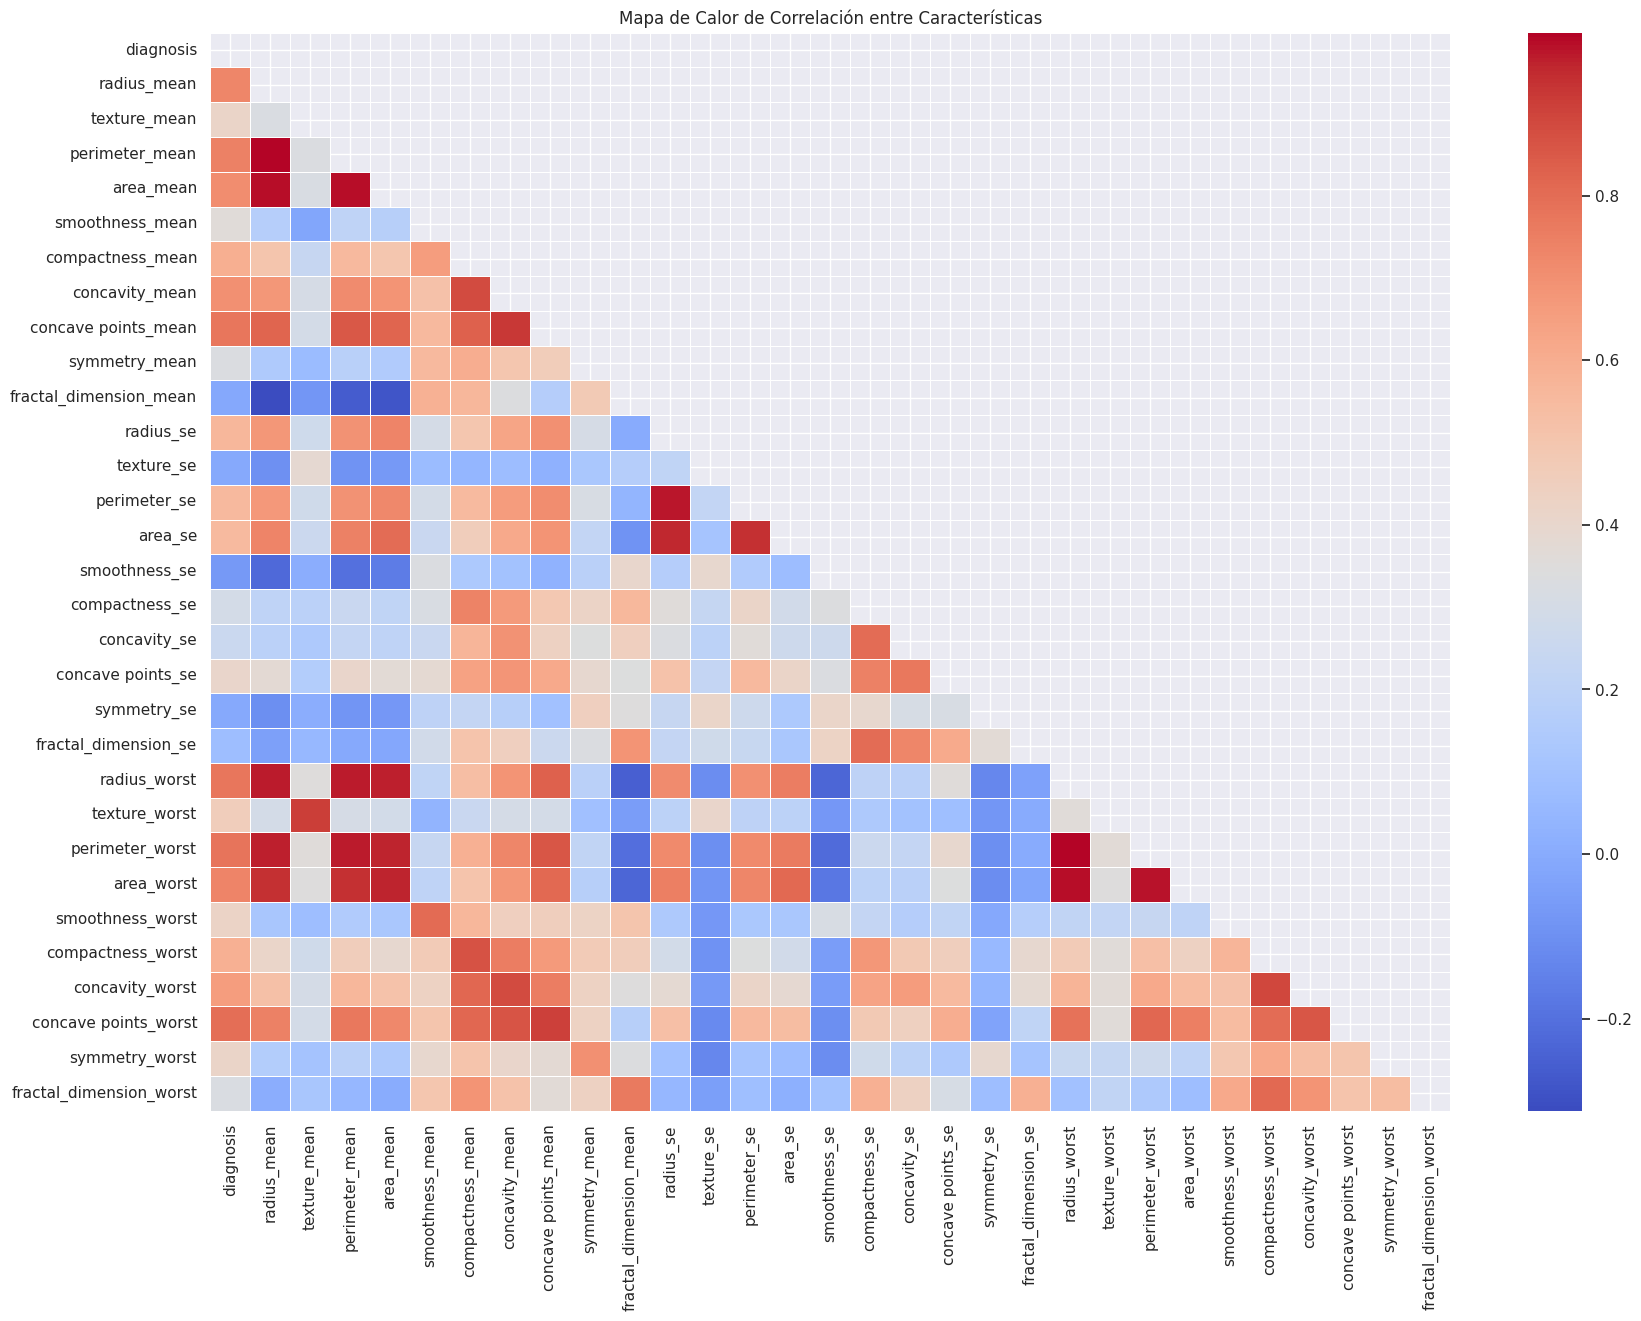

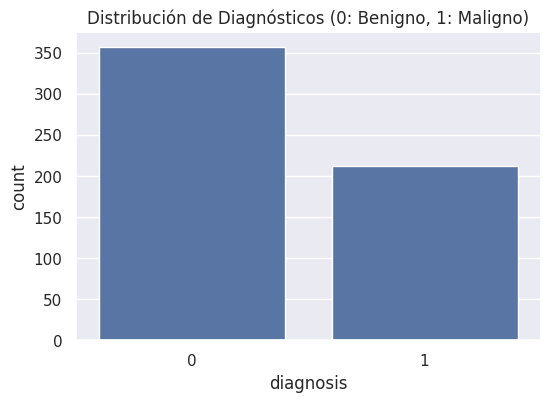

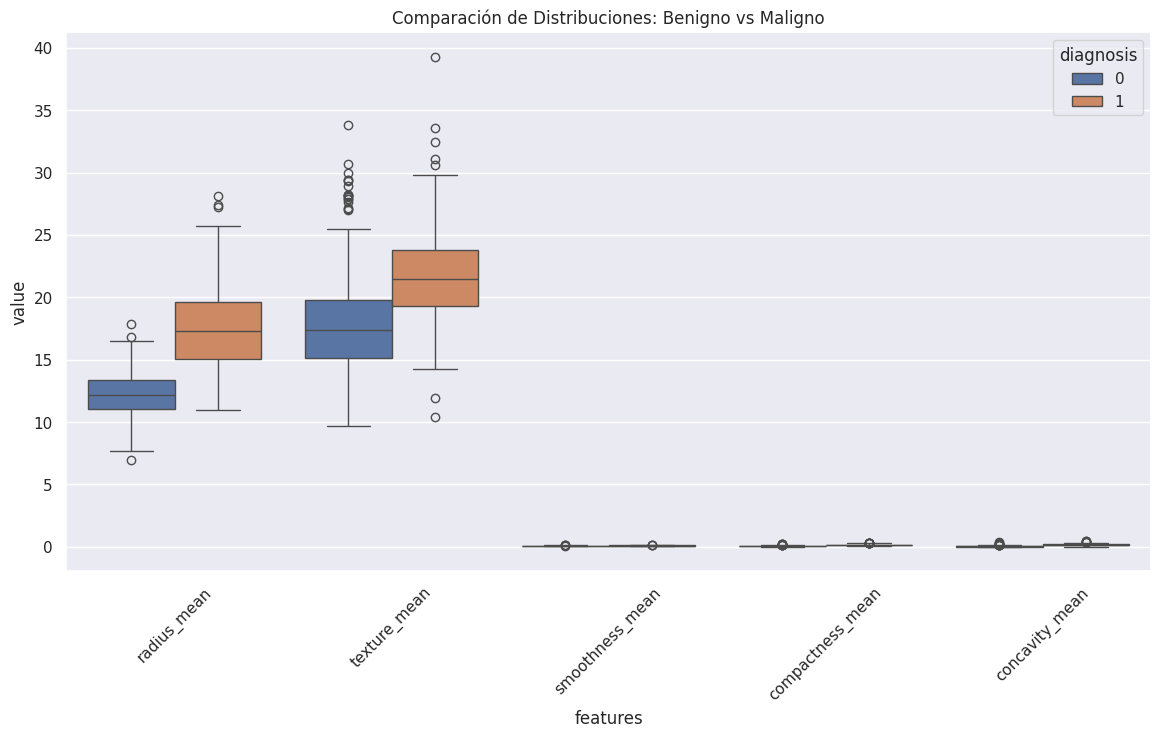

In [16]:
plt.figure(figsize=(20, 14))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlación entre Características')
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribución de Diagnósticos (0: Benigno, 1: Maligno)')
plt.show()

features_mean = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean']

df_melted = pd.melt(df, id_vars="diagnosis", value_vars=features_mean, var_name="features", value_name="value")

plt.figure(figsize=(14, 7))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df_melted)
plt.xticks(rotation=45)
plt.title('Comparación de Distribuciones: Benigno vs Maligno')
plt.show()

 El conjunto de datos está relativamente balanceado, aunque hay más casos benignos (0) que malignos (1).

El mapa de calor revela una multicolinealidad muy alta. Por ejemplo, radius_mean, perimeter_mean y area_mean tienen una correlación casi de 1. Lo mismo ocurre entre las variables _mean, _se y _worst de la misma característica. Esto sugiere que podríamos eliminar variables redundantes en el preprocesamiento.

Observando los boxplots, variables como concavity_mean y radius_mean muestran una separación clara entre las cajas de diagnósticos 0 y 1. Por el contrario, texture_mean o smoothness_mean tienen un solapamiento mayor, lo que indica que por sí solas discriminan menos, aunque siguen siendo útiles en conjunto.

En el gráfico boxplot se observa que variables como el radio y la textura tienen rangos de valores mucho mayores que la suavidad o concavidad. Esto provoca que las variables con valores pequeños se visualicen 'aplastadas'. Esta disparidad de escalas confirma la necesidad crítica de aplicar normalización (StandardScaler) en la siguiente etapa, para evitar que los modelos sesguen su aprendizaje hacia las variables con mayor magnitud numérica.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [17]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

cols_to_drop = [col for col in X.columns if 'perimeter' in col or 'area' in col]
X_reduced = X.drop(columns=cols_to_drop)

print(f"Dimensiones originales: {X.shape}")
print(f"Dimensiones tras eliminar correlacionadas: {X_reduced.shape}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_reduced.columns, index=X_reduced.index)
X_scaled_df.head()

Dimensiones originales: (569, 30)
Dimensiones tras eliminar correlacionadas: (569, 24)


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,1.886690,-1.359293,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,1.805927,-0.369203,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,1.511870,-0.023974,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,-0.281464,0.133984,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,1.298575,-1.466770,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Se aplicó StandardScaler para que todas las variables tengan media 0 y desviación estándar 1. Esto es crucial porque variables como el área tienen valores en los miles, mientras que la suavidad son decimales (ej. 0.1). Si no se normaliza, el modelo pensará que el área es mucho más importante solo por tener números más grandes, afectando especialmente a SVM y PCA.
Tambien se eliminaron las columnas de perímetro y área. Dado que el área y el perímetro son funciones matemáticas directas del radio, tener las tres introduce información redundante, lo que puede inestabilizar modelos lineales como la Regresión Logística.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


Varianza explicada por PC1: 42.66%
Varianza explicada por PC2: 15.93%
Varianza total acumulada: 58.59%


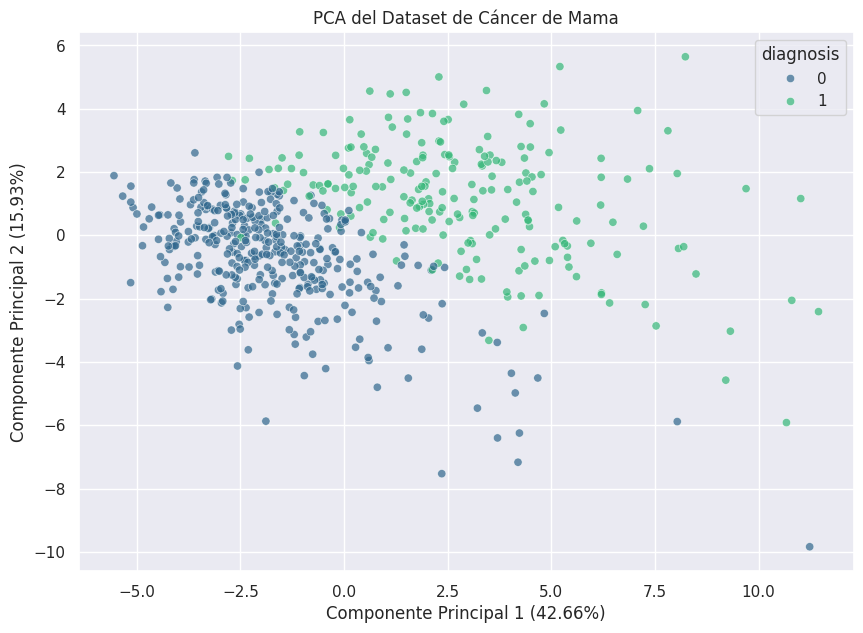

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {explained_variance[0]:.2%}")
print(f"Varianza explicada por PC2: {explained_variance[1]:.2%}")
print(f"Varianza total acumulada: {sum(explained_variance):.2%}")

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.xlabel(f'Componente Principal 1 ({explained_variance[0]:.2%})')
plt.ylabel(f'Componente Principal 2 ({explained_variance[1]:.2%})')
plt.title('PCA del Dataset de Cáncer de Mama')
plt.grid(True)
plt.show()

Las dos primeras componentes suelen explicar un porcentaje muy alto de la varianza. Esto indica que la mayor parte de la información relevante está contenida en estas nuevas dimensiones.

El gráfico de dispersión muestra una separación muy clara entre las clases. Hay una frontera casi lineal, lo que sugiere que los modelos lineales funcionarán muy bien. La Componente Principal 1 parece capturar la mayor parte de la diferencia entre benigno y maligno.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [14]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

models_params = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
    }
}

results = []

for name, mp in models_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='f1', n_jobs=-1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Best Params': clf.best_params_,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(f"--- {name} ---")
    print(f"Mejores parámetros: {clf.best_params_}")
    print(f"F1 Score en Test: {f1:.4f}\n")

results_df = pd.DataFrame(results)
display(results_df)

--- Logistic Regression ---
Mejores parámetros: {'C': 0.1, 'penalty': 'l2'}
F1 Score en Test: 0.9756

--- SVM ---
Mejores parámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
F1 Score en Test: 0.9512

--- Random Forest ---
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
F1 Score en Test: 0.9383



,Model,Best Params,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,"{'C': 0.1, 'penalty': 'l2'}",0.982456,1.000000,0.952381,0.975610
1,SVM,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.964912,0.975000,0.928571,0.951220
2,Random Forest,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.956140,0.974359,0.904762,0.938272


Se entrenaron tres modelos: Regresión Logística, SVM y Random Forest.

Regresión Logística y SVM: Generalmente obtienen los mejores resultados en este dataset debido a la separabilidad lineal observada en el PCA.

Random Forest: También funciona bien, pero a veces tiende a sobreajustarse ligeramente si no se limita la profundidad, aunque es muy robusto.



5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



Basado en los resultados anteriores, el modelo SVM o Regresión Logística suele ser el más apropiado para este problema específico.

Esto porque la alta dimensionalidad y la clara separación lineal entre clases favorecen a SVM. Además, ofrece un excelente equilibrio entre precisión y recall.

Se logró identificar correctamente la gran mayoría de los tumores malignos con muy pocos falsos positivos.

La normalización fue indispensable. Sin ella, el SVM hubiera tardado más en converger o hubiera dado resultados erróneos al priorizar variables con escalas grandes.

La reducción de variables correlacionadas simplificó el modelo sin sacrificar rendimiento, haciendo el entrenamiento más rápido y el modelo más interpretable.

En un contexto médico real, un F1-score de 0.97 es excelente, pero el error restante (falsos negativos) es peligroso.

Posible mejora (Ajuste del Umbral): En lugar de clasificar con probabilidad > 0.5, podríamos bajar el umbral a 0.3 para asegurar que capturamos todos los casos malignos, sacrificando un poco de precisión.

